In [2]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [6]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,45107400.0,800.770020
2022-02-25,819.500000,782.400024,809.229980,809.869995,25309500.0,809.869995


<AxesSubplot:xlabel='Date'>

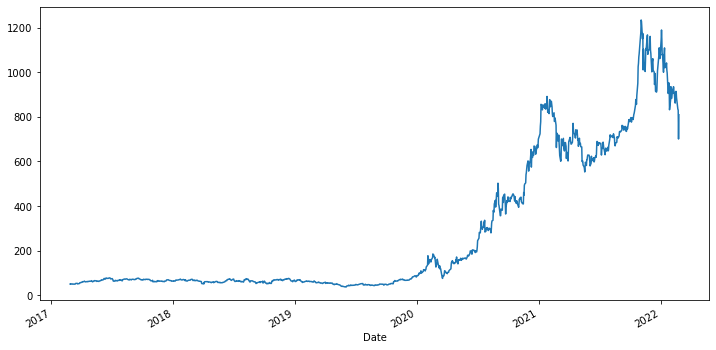

In [7]:
df_tesla['Open'].plot(figsize=(12,6))

In [9]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

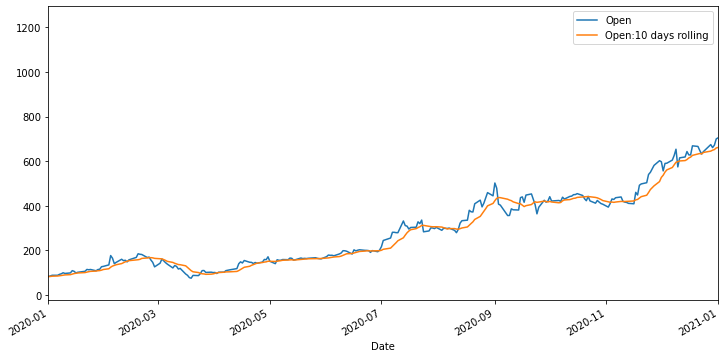

In [11]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,6))

In [12]:
df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

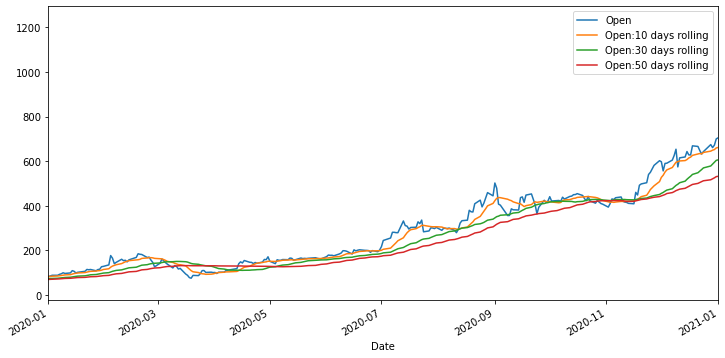

In [13]:
df_tesla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,6))

<AxesSubplot:xlabel='Date'>

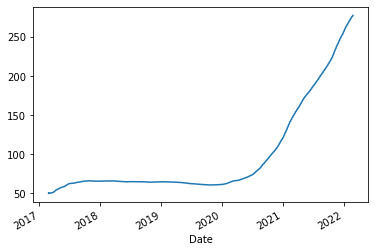

In [14]:
#Expanding
# the following curve is the cumulative moving avg for diff diff years
df_tesla['Open'].expanding().mean().plot()

In [15]:
#Exponential moving avg
#Let's smooth curving with alpha value 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

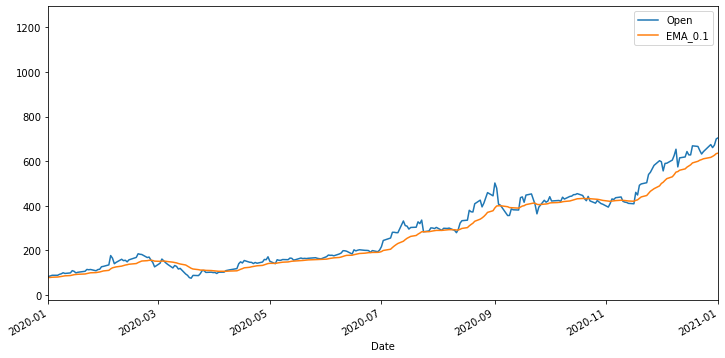

In [16]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,6))

In [17]:
#smoothing curve for factor 0.3
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

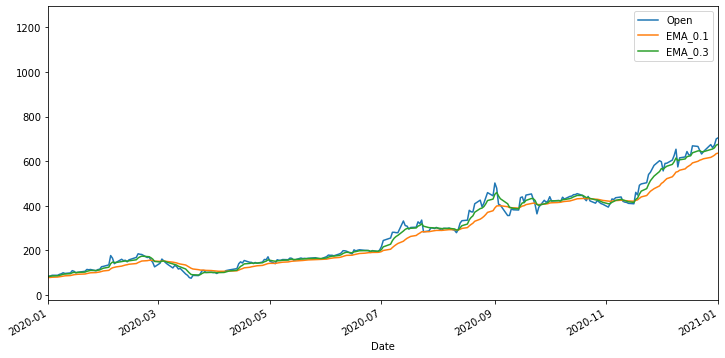

In [19]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,6))